<a href="https://colab.research.google.com/github/KurisuZhang/Boating01_Basic/blob/main/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

### download dataset & DataLoader

In [39]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())

batch_size = 64
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=batch_size,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=batch_size,shuffle=False)

### Define network architecture

In [4]:
class LinearReg(torch.nn.Module):
  def __init__(self):
    super(LinearReg, self).__init__()
    self.linear_1 = torch.nn.Linear(28*28,256)
    self.linear_2 = torch.nn.Linear(256,128)
    self.linear_3 = torch.nn.Linear(128,64)
    self.linear_output = torch.nn.Linear(64,10)
    self.relu = torch.nn.ReLU()

  def forward(self, x):
    x = x.view(-1,28*28)

    out = self.linear_1(x)
    out = self.relu(out)
    out = self.linear_2(out)
    out = self.relu(out)
    out = self.linear_3(out)
    out = self.relu(out)
    out = self.linear_output(out)

    return out

net = LinearReg().cuda()
Loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

### Tranning

In [5]:
train_loss_history = []
test_loss_history = []

for epoch in range(20):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    predicted_output = net(images)
    fit = Loss(predicted_output,labels)
    fit.backward()
    optimizer.step()
    train_loss += fit.item()
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = net(images)
      fit = Loss(predicted_output,labels)
      test_loss += fit.item()
  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  print('Epoch %s, Train loss %s, Test loss %s'%(epoch, train_loss, test_loss))

Epoch 0, Train loss 1.8124695234080113, Test loss 1.0608523582956593
Epoch 1, Train loss 0.8603097321128031, Test loss 0.7817496535884347
Epoch 2, Train loss 0.691737867971219, Test loss 0.6561810913359284
Epoch 3, Train loss 0.6049712259632184, Test loss 0.6343625713685516
Epoch 4, Train loss 0.5520883998605234, Test loss 0.6073643982790078
Epoch 5, Train loss 0.517778656550689, Test loss 0.5240179163635157
Epoch 6, Train loss 0.49034826328823056, Test loss 0.5042625808032455
Epoch 7, Train loss 0.4702379362923758, Test loss 0.48644792046516566
Epoch 8, Train loss 0.45178875234970917, Test loss 0.5431214157183459
Epoch 9, Train loss 0.4377556128351927, Test loss 0.45511761563978376
Epoch 10, Train loss 0.426228263659645, Test loss 0.4704142417877343
Epoch 11, Train loss 0.4153214718010634, Test loss 0.518676614685423
Epoch 12, Train loss 0.405807743671098, Test loss 0.4636938646910297
Epoch 13, Train loss 0.3955499390676332, Test loss 0.4535922399561876
Epoch 14, Train loss 0.38654390

### train- and test- loss curves

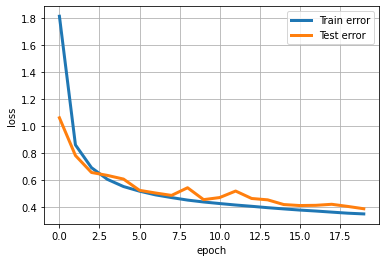

In [6]:
plt.plot(range(20),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(20),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

### test accuracy

In [38]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

n_correct = 0
n_samples = 0
for images, labels in testDataLoader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()
      
accurace = 100.0 * n_correct / n_samples
print(f'Accuracy of the network: {accurace} %')

Accuracy of the network: 86.14 %


### 3 image samples, visualize the predicted class probabilities

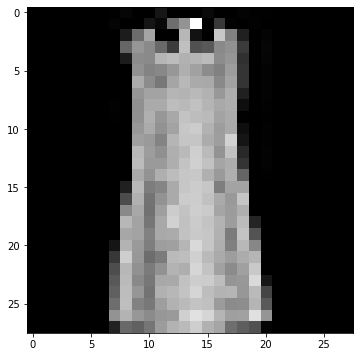

predict correct
predicted class probabilities is : [ 4.188182   1.0812962  0.4868135  6.951038   1.2587215 -5.9300404
  2.6513836 -5.440521   1.4013691 -4.834002 ]
True label is 3, predicted label is 3


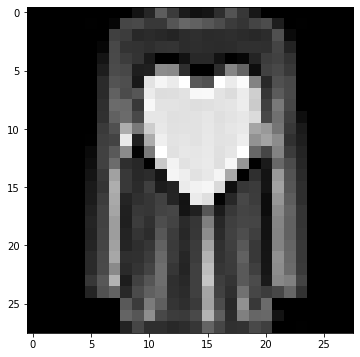

predict wrong
predicted class probabilities is : [ 3.546933   3.0188005  1.6293657  2.8452587  0.1052426 -2.7657065
  2.4353747 -4.298611  -1.3197377 -4.7472887]
True label is 2, predicted label is 0


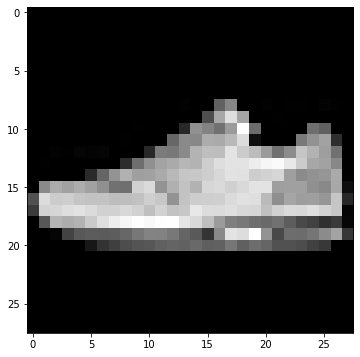

predict correct
predicted class probabilities is : [-3.3430548 -8.641174  -5.388685   0.2874835 -4.726373   6.248024
 -5.071958  13.70853    3.8381395  7.458815 ]
True label is 7, predicted label is 7


In [79]:
# calculate ouotput label
predicted_prob = net(images)
predicted_output = torch.max(predicted_prob, 1)
predicted_prob = predicted_prob.to("cpu")

for index in np.arange(0,3):
  plt.figure(figsize=(6,6))
  plt.imshow(images[index].cpu().squeeze().numpy(),cmap=plt.cm.gray)
  plt.show()

  predict_label = predicted_output.indices[index].item()
  print("predict correct") if predict_label == labels[index] else print("predict wrong")
  print("predicted class probabilities is : {}".format(predicted_prob[index].detach().numpy()))
  print("True label is {}, predicted label is {}".format(labels[index],predict_label))

### observation

As we can see after add more 3 layers to the neural network, the performance is better than the single layer neural network in demo 1. But also can see, after 7 epochs, the traning loss goes low, while test loss goes high, this is a little overffing. 